# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Latifatul Khumairoh
- **Email:** latifatul.khumairoh@gmail.com
- **ID Dicoding:** latifatul_kh21

## Menentukan Pertanyaan Bisnis





1. Apa saja 10 kategori produk dengan jumlah produk terjual tertinggi? Apa saja 10 kategori produk dengan jumlah penjualan tertinggi? Apakah keduanya sama?
2. Bagaimana tingkat kepuasan pelanggan terhadap layanan?
3. Tipe pembayaran apa yang paling sering digunakan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Membuka semua data csv
mydata = "/content/drive/MyDrive/data_ecommerce"
customers = pd.read_csv(mydata + "/customers_dataset.csv")
geolocation = pd.read_csv(mydata + "/geolocation_dataset.csv")
reviews = pd.read_csv(mydata + "/order_reviews_dataset.csv")
items = pd.read_csv(mydata + "/order_items_dataset.csv")
payments = pd.read_csv(mydata + "/order_payments_dataset.csv")
orders = pd.read_csv(mydata + "/orders_dataset.csv")
categories = pd.read_csv(mydata + "/product_category_name_translation.csv")
products = pd.read_csv(mydata + "/products_dataset.csv")
sellers = pd.read_csv(mydata + "/sellers_dataset.csv")

In [ ]:
# Melihat 5 baris teratas dari setiap dataframe
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
categories.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

1. Periksa tipa data tiap dataframe

In [ ]:
# Periksa tipe data tiap kolom dalam dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479031 entries, 0 to 479030
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  479031 non-null  int64  
 1   geolocation_lat              479031 non-null  float64
 2   geolocation_lng              479031 non-null  float64
 3   geolocation_city             479031 non-null  object 
 4   geolocation_state            479030 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 18.3+ MB


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


2. Periksa ada tidaknya data duplikat

In [ ]:
# Periksa data duplikat
customers.duplicated().sum()

0

In [ ]:
geolocation.duplicated().sum()

150169

In [ ]:
reviews.duplicated().sum()

0

In [ ]:
items.duplicated().sum()

0

In [ ]:
payments.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
categories.duplicated().sum()

0

In [ ]:
products.duplicated().sum()

0

In [ ]:
sellers.duplicated().sum()

0

3. Periksa missing values

In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
geolocation.isna().sum()


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              1
dtype: int64

In [ ]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
categories.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Cleaning Data

1. Data Customer

In [ ]:
# Tidak dilakukan cleaning data karena tidak terdapat data duplikat dan missing value
# Data manipulasi
customers['customer_city'] = customers['customer_city'].str.title()
customers['customer_city'] = customers['customer_city'].str.replace("_"," ")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


2. Data Geolocation

In [ ]:
# Menghapus data duplikat
geolocation.drop_duplicates(inplace = True)
geolocation.duplicated().sum()

0

3. Data Review

In [ ]:
# Menghapus kolom yang terdapat missing value
reviews.drop(columns=["review_comment_title","review_comment_message"], inplace=True)

In [ ]:
reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

4. Data Item

In [ ]:
# Tidak dilakukan cleaning data karena tidak terdapat data duplikat dan missing value

5. Data Payment

In [ ]:
# Tidak dilakukan cleaning data karena tidak terdapat data duplikat dan missing value
# Data manipulasi
payments['payment_type'] = payments['payment_type'].str.title()
payments['payment_type'] = payments['payment_type'].str.replace("_"," ")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45


6. Data Order

In [ ]:
# Menghapus kolom yang terdapat missing value
orders.drop(columns=["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date"], inplace=True)

In [ ]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
# Data manipulasi
orders['order_status'] = orders['order_status'].str.title()
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-07-24 20:41:37,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-08 08:38:49,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,Delivered,2017-11-18 19:28:06,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,Delivered,2018-02-13 21:18:39,2018-02-26 00:00:00


7. Data Categories

In [ ]:
# Tidak dilakukan cleaning data karena tidak terdapat data duplikat dan missing value
# Data manipulasi
categories['product_category_name'] = categories['product_category_name'].str.title()
categories['product_category_name_english'] = categories['product_category_name_english'].str.title()
categories['product_category_name'] = categories['product_category_name'].str.replace("_"," ")
categories['product_category_name_english'] = categories['product_category_name_english'].str.replace("_"," ")
categories.head()

,product_category_name,product_category_name_english
0,Beleza Saude,Health Beauty
1,Informatica Acessorios,Computers Accessories
2,Automotivo,Auto
3,Cama Mesa Banho,Bed Bath Table
4,Moveis Decoracao,Furniture Decor


8. Data Product

In [96]:
# Data manipulasi
products['product_category_name'] = products['product_category_name'].str.title()
products['product_category_name'] = products['product_category_name'].str.replace("_"," ")

# Hapus kolom yang tidak digunakan
products_rev = products.iloc[:,:2]

# Cek missing value
products_rev.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [97]:
print("Kita harus menghapus sebanyak: " + str(products_rev['product_category_name'].isna().sum()*100/len(products_rev)) + "% data product category name untuk menghilangkan missing value")

Kita harus menghapus sebanyak: 1.8512336499650996% data product category name untuk menghilangkan missing value


In [98]:
# Hapus missing value
products_rev.dropna(subset=['product_category_name'], inplace=True)

In [99]:
products_rev.isna().sum()

product_id               0
product_category_name    0
dtype: int64

In [100]:
products_rev[products_rev['product_category_name'].isna() == True]

,product_id,product_category_name


9. Data Sellers

In [66]:
# Tidak dilakukan cleaning data karena tidak terdapat data duplikat dan missing value
# Data manipulasi
sellers['seller_city'] = sellers['seller_city'].str.title()
sellers['seller_city'] = sellers['seller_city'].str.replace("_"," ")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


## Exploratory Data Analysis (EDA)

### Explore Customers

In [78]:
customers.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
Sao Paulo         15540
Rio De Janeiro     6882
Belo Horizonte     2773
Brasilia           2131
Curitiba           1521
                  ...  
Ibiara                1
Rio Espera            1
Rio Dos Indios        1
Rio Dos Cedros        1
Lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [79]:
customers.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Geolocation

In [80]:
# Tidak dilakukan eksplorasi untuk data ini karena tidak diperlukan dalam analisis

### Explore Orders

In [128]:
orders.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
Delivered      96478
Shipped         1107
Canceled         625
Unavailable      609
Invoiced         314
Processing       301
Created            5
Approved           2
Name: order_id, dtype: int64

In [92]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-07-24 20:41:37,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-08 08:38:49,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,Delivered,2017-11-18 19:28:06,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,Delivered,2018-02-13 21:18:39,2018-02-26


In [84]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


Merge Customers dan Orders

In [93]:
cust_orders = pd.merge(
    left = customers,
    right = orders,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
cust_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,Delivered,2017-05-16 15:05:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,Delivered,2018-01-12 20:48:24,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,Delivered,2018-05-19 16:07:45,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,Delivered,2018-03-13 16:06:38,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,Delivered,2018-07-29 09:51:30,2018-08-15


In [94]:
cust_orders.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

### Explore Products

In [101]:
products_rev.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes
2,96bd76ec8810374ed1b65e291975717f,Esporte Lazer
3,cef67bcfe19066a932b7673e239eb23d,Bebes
4,9dc1a7de274444849c219cff195d0b71,Utilidades Domesticas


### Explore Categories

In [102]:
categories.head()

,product_category_name,product_category_name_english
0,Beleza Saude,Health Beauty
1,Informatica Acessorios,Computers Accessories
2,Automotivo,Auto
3,Cama Mesa Banho,Bed Bath Table
4,Moveis Decoracao,Furniture Decor


Merge Products dan Categories

In [109]:
prod_cats = pd.merge(
    left = products_rev,
    right = categories,
    how = "left",
    left_on = "product_category_name",
    right_on = "product_category_name"
)
prod_cats.sample(5)

,product_id,product_category_name,product_category_name_english
23725,43adec23c5b0d25ac0f521430a176623,Beleza Saude,Health Beauty
6227,1c5b28beb34835f960261f45ba22a136,Perfumaria,Perfumery
4287,0dda66cf50e9782e3b4499568095bba2,Perfumaria,Perfumery
24036,64693ed5472651f9ea64d52a689d9ea0,Utilidades Domesticas,Housewares
12004,205ff90a4060e651110a277efa4633fd,Beleza Saude,Health Beauty


### Explore Payment

In [82]:
payments.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

payment_type
Credit Card    76795
Boleto         19784
Voucher         5775
Debit Card      1529
Not Defined        3
Name: order_id, dtype: int64

Merge Customers Orders dan Payments

In [111]:
merge1 = pd.merge(
    left = cust_orders,
    right = payments,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,Delivered,2017-05-16 15:05:35,2017-06-05,1.0,Credit Card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,Delivered,2018-01-12 20:48:24,2018-02-06,1.0,Credit Card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,Delivered,2018-05-19 16:07:45,2018-06-13,1.0,Credit Card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,Delivered,2018-03-13 16:06:38,2018-04-10,1.0,Credit Card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,Delivered,2018-07-29 09:51:30,2018-08-15,1.0,Credit Card,8.0,252.25


### Explore Items

In [113]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [114]:
merge2 = pd.merge(
    left = merge1,
    right = items,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
merge2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,Delivered,2017-05-16 15:05:35,2017-06-05,1.0,Credit Card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,Delivered,2018-01-12 20:48:24,2018-02-06,1.0,Credit Card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,Delivered,2018-05-19 16:07:45,2018-06-13,1.0,Credit Card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,Delivered,2018-03-13 16:06:38,2018-04-10,1.0,Credit Card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,Delivered,2018-07-29 09:51:30,2018-08-15,1.0,Credit Card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


Merge Customers, Orders, Payments, Items dengan Products dan Categories

In [116]:
merge3 = pd.merge(
    left = merge2,
    right = prod_cats,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)
merge3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,...,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,Delivered,2017-05-16 15:05:35,2017-06-05,1.0,...,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Moveis Escritorio,Office Furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,Delivered,2018-01-12 20:48:24,2018-02-06,1.0,...,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Utilidades Domesticas,Housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,Delivered,2018-05-19 16:07:45,2018-06-13,1.0,...,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Moveis Escritorio,Office Furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,Delivered,2018-03-13 16:06:38,2018-04-10,1.0,...,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Moveis Escritorio,Office Furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,Delivered,2018-07-29 09:51:30,2018-08-15,1.0,...,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Casa Conforto,Home Confort


### Explore Sellers

In [121]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [123]:
merge4 = pd.merge(
    left = merge3,
    right = sellers,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
merge4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,...,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,Delivered,2017-05-16 15:05:35,2017-06-05,1.0,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Moveis Escritorio,Office Furniture,8577.0,Itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,Delivered,2018-01-12 20:48:24,2018-02-06,1.0,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Utilidades Domesticas,Housewares,88303.0,Itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,Delivered,2018-05-19 16:07:45,2018-06-13,1.0,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Moveis Escritorio,Office Furniture,8577.0,Itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,Delivered,2018-03-13 16:06:38,2018-04-10,1.0,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Moveis Escritorio,Office Furniture,8577.0,Itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,Delivered,2018-07-29 09:51:30,2018-08-15,1.0,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Casa Conforto,Home Confort,14940.0,Ibitinga,SP


### Explore Reviews

In [124]:
reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


In [129]:
ecommerce = pd.merge(
    left = merge4,
    right = reviews,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

In [159]:
ecommerce.to_csv('/content/drive/My Drive/mydata.csv', index=False)

In [130]:
pd.set_option('display.max_columns', None)
ecommerce.sample(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp
70325,53f9e8b5951b3192ee519409479d4d6d,f96be73d5c1d3bfe8fcba7924798ba91,13500,Rio Claro,SP,bfea95ad916f92dc69b5291e6827a01f,Delivered,2018-05-18 13:22:34,2018-06-07,1.0,Credit Card,5.0,309.81,1.0,d1c965e9559fed1df80e7488ce88d53f,620c87c171fb2a6dd6e8bb4dec959fc6,2018-05-23 13:36:47,289.90,19.91,Perfumaria,Perfumery,25645.0,Petropolis,RJ,85e16b77c12c7d215e31641c2440a51d,5.0,2018-06-06,2018-06-06 20:53:08
22722,3192b8d6493a72fa2b748cf450624408,c3011c677962bdd216780c9197d666f7,95012,Caxias Do Sul,RS,f2fe33e91924ce0b0182264712504584,Delivered,2017-07-07 10:51:33,2017-08-02,1.0,Credit Card,1.0,135.49,1.0,2ac0cca735ca6684053d28a17883b765,7aa4334be125fcdd2ba64b3180029f14,2017-07-13 11:03:42,119.90,15.59,Bebes,Baby,18500.0,Laranjal Paulista,SP,32a3bb0413a550ccbd1f937b8fbbadc6,4.0,2017-07-21,2017-07-21 23:42:25
85967,d2e68d3ebaf2dc8deaf4cd28ec5c9da7,97f3624adbe2de46e29901ebdbbbb643,32900,Igarape,MG,0f17366db3415102c789999a513bbd35,Invoiced,2017-11-16 13:25:07,2017-12-14,1.0,Credit Card,1.0,185.74,1.0,ffbfa9e143fda4420454d0f4e88a3cd5,20b54c376b794ed028df09a3cd88e8dc,2017-11-27 13:35:52,169.79,15.95,Informatica Acessorios,Computers Accessories,9560.0,Sao Caetano Do Sul,SP,a324e2993e5b0066052397a2acd046b5,1.0,2017-12-16,2017-12-16 03:06:44
68492,dca4fcf46c15aad61c6cc88d568a31da,4c1f5b9ba3f481c3a4e3a1b366c683fc,32675,Betim,MG,e73242af72f21b83ed57aeb572c4f62c,Delivered,2017-12-28 21:45:01,2018-01-24,1.0,Credit Card,6.0,206.68,1.0,bd1aace4fad5609f005fd721b45dcec4,da8622b14eb17ae2831f4ac5b9dab84a,2018-01-04 21:56:21,184.90,21.78,Cama Mesa Banho,Bed Bath Table,13405.0,Piracicaba,SP,0d65bf6c54e217b5ba5d38b2f4edfd0d,5.0,2018-01-09,2018-01-09 15:03:08
72837,10af20cea993579b8dc7401672f14658,815e91418821489c26f04e5fc6c7b0ce,90020,Porto Alegre,RS,429738a6445a19289b754b8c3f0b058f,Delivered,2018-01-29 16:21:48,2018-03-02,1.0,Credit Card,3.0,76.65,1.0,5984d199ed3cbe4f2736a4c24559af8c,1554a68530182680ad5c8b042c3ab563,2018-02-02 16:31:42,47.90,28.75,Moveis Decoracao,Furniture Decor,37580.0,Monte Siao,MG,a5e899f4e61530ca9ac13cd1149cf86d,5.0,2018-02-08,2018-02-14 15:30:05
103386,875a1e0d9fa0e8aaa253208331a4a3fe,87e69f05e13093d268cc2de1a3690318,27925,Macae,RJ,ddc3af0538e1279d548f8e4f6cbcc9de,Delivered,2018-08-10 19:45:23,2018-08-23,1.0,Boleto,1.0,147.07,3.0,b0c89945c034268074f5f80b362bda34,1835b56ce799e6a4dc4eddc053f04066,2018-08-14 02:44:37,29.99,19.04,Cama Mesa Banho,Bed Bath Table,14940.0,Ibitinga,SP,f0e588322dbd4d1c8fd66f61805a4b44,5.0,2018-08-22,2018-08-22 19:49:48
14736,1c046c32f1026cd41aae355ed7c8585f,d4810b4aac3f3fb339b0857b88021f12,7082,Guarulhos,SP,75fc2d6227460881589d526e733e0499,Delivered,2018-04-26 21:39:21,2018-05-10,1.0,Credit Card,3.0,82.33,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-04 08:12:13,69.90,12.43,Moveis Decoracao,Furniture Decor,4782.0,Sao Paulo,SP,3d5a24665000f8aeeb96511978a27da1,5.0,2018-05-03,2018-05-03 22:44:23


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja 10 kategori produk dengan jumlah produk terjual tertinggi? Apa saja 10 kategori produk dengan jumlah penjualan tertinggi? Apakah keduanya sama?

In [138]:
cats_terjual = ecommerce.groupby('product_category_name_english')['product_id'].count().reset_index().sort_values(by = 'product_id', ascending = False)
cats_terjual

,product_category_name_english,product_id
7,Bed Bath Table,11988
43,Health Beauty,10032
65,Sports Leisure,9004
39,Furniture Decor,8832
15,Computers Accessories,8150
...,...,...
3,Arts And Craftmanship,24
52,La Cuisine,16
11,Cds Dvds Musicals,14
29,Fashion Childrens Clothes,8


In [140]:
cats_penjualan = ecommerce.groupby('product_category_name_english')['payment_value'].sum().reset_index().sort_values(by = 'payment_value', ascending = False)
cats_penjualan

,product_category_name_english,payment_value
7,Bed Bath Table,1743998.80
43,Health Beauty,1662963.59
15,Computers Accessories,1599481.06
39,Furniture Decor,1443963.61
70,Watches Gifts,1430553.48
...,...,...
35,Flowers,2213.01
46,Home Comfort 2,1710.54
11,Cds Dvds Musicals,1199.43
29,Fashion Childrens Clothes,785.67


<ipython-input-144-06943ad8b965>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=cats_terjual.head(10), palette = 'terrain_r', ax = ax[0])
<ipython-input-144-06943ad8b965>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name_english", data=cats_penjualan.head(10), palette = 'terrain_r', ax = ax[1])


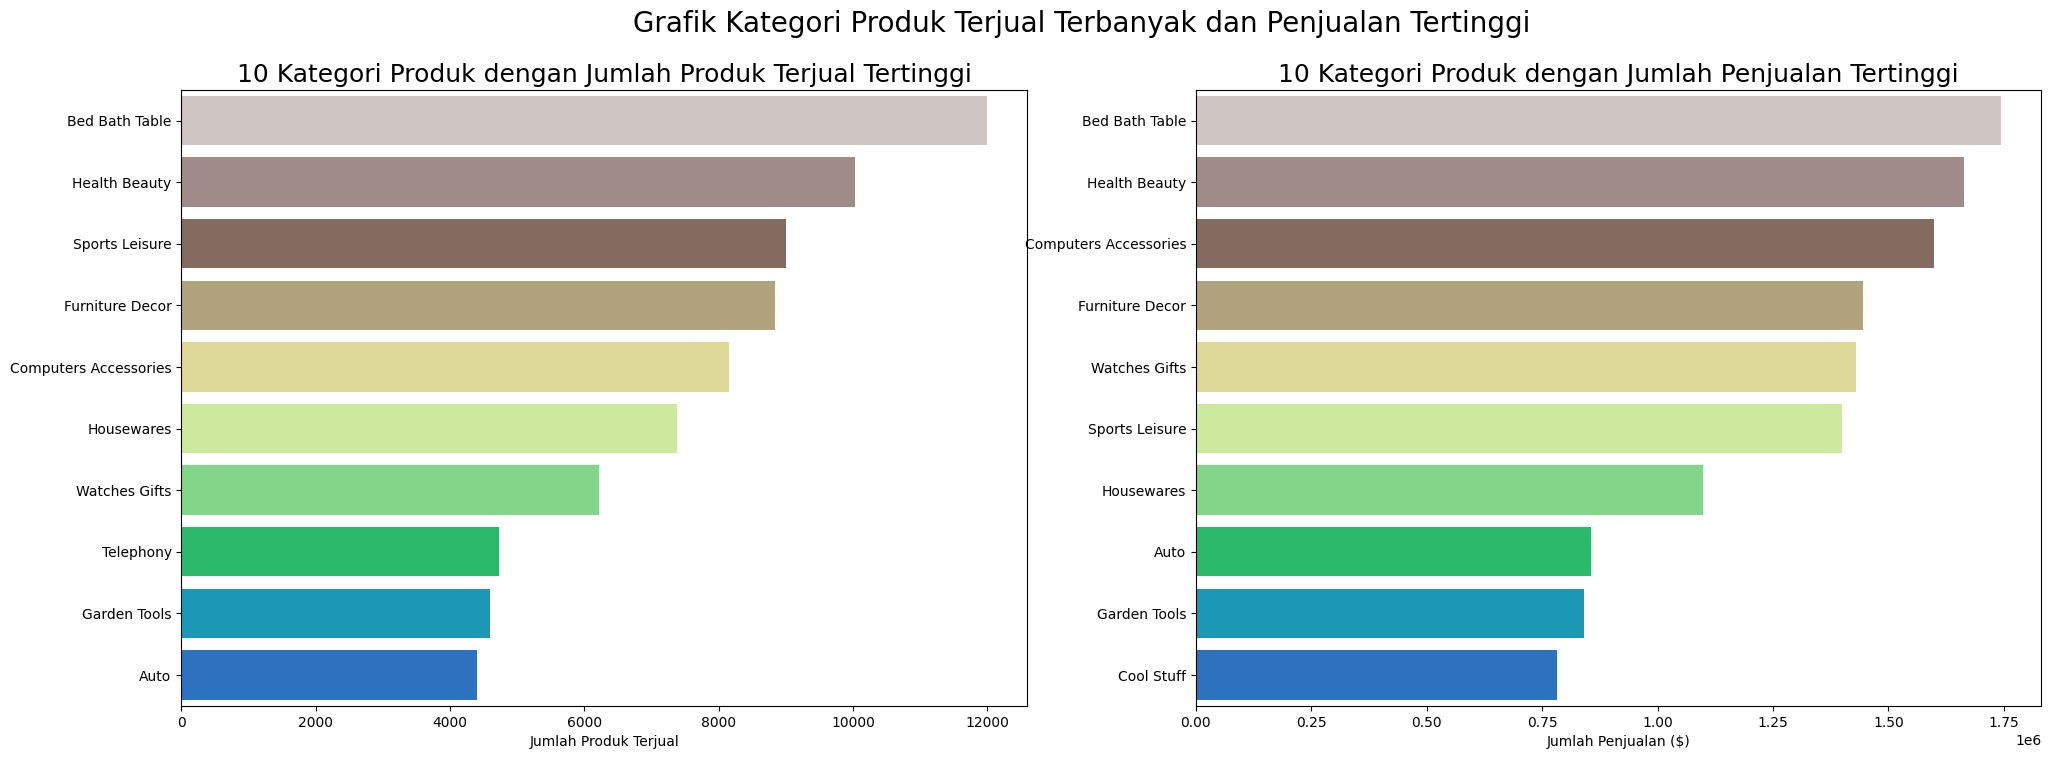

In [144]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24,8))
sns.barplot(x="product_id", y="product_category_name_english", data=cats_terjual.head(10), palette = 'terrain_r', ax = ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Jumlah Produk Terjual')
ax[0].set_title('10 Kategori Produk dengan Jumlah Produk Terjual Tertinggi', loc="center", fontsize=18)
sns.barplot(x="payment_value", y="product_category_name_english", data=cats_penjualan.head(10), palette = 'terrain_r', ax = ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Jumlah Penjualan ($)')
ax[1].set_title('10 Kategori Produk dengan Jumlah Penjualan Tertinggi', loc="center", fontsize=18)

plt.suptitle("Grafik Kategori Produk Terjual Terbanyak dan Penjualan Tertinggi", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana tingkat kepuasan pelanggan terhadap layanan?

---



<ipython-input-154-b8abb809437c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = review_scores.index,


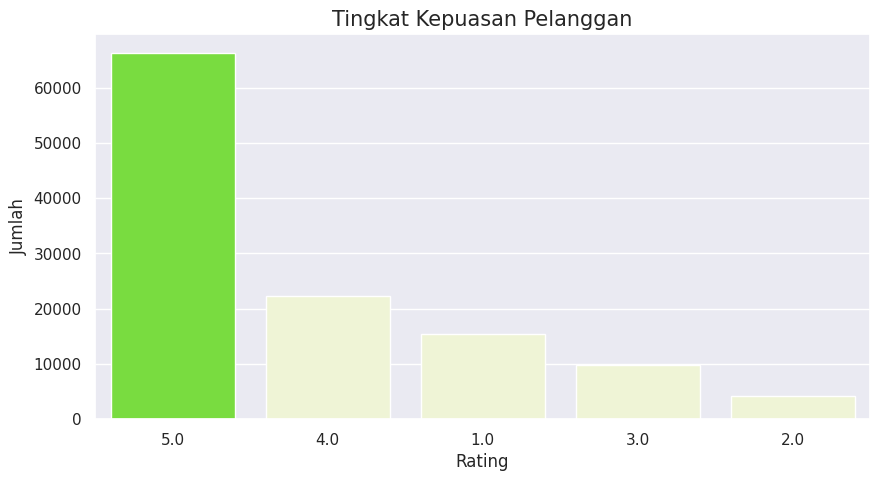

In [154]:
review_scores = ecommerce['review_score'].value_counts().sort_values(ascending=False)
most_score = review_scores.idxmax()

plt.figure(figsize = (10, 5))
sns.barplot(x = review_scores.index,
            y = review_scores.values,
            order = review_scores.index,
            palette = ["#72F626" if score == most_score else "#F3F9D1" for score in review_scores.index]
            )

plt.title("Tingkat Kepuasan Pelanggan", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

### Pertanyaan 3: Tipe pembayaran apa yang paling sering digunakan pelanggan?

---

In [156]:
group_payment = ecommerce.groupby('payment_type')['order_id'].nunique()
group_payment_percentage = (group_payment / ecommerce['order_id'].nunique() * 100).round(2)
group_payment_percentage = pd.DataFrame(group_payment_percentage)
group_payment_percentage.reset_index(inplace=True)
group_payment_percentage

,payment_type,order_id
0,Boleto,19.90
1,Credit Card,76.94
2,Debit Card,1.54
3,Not Defined,0.00
4,Voucher,3.89


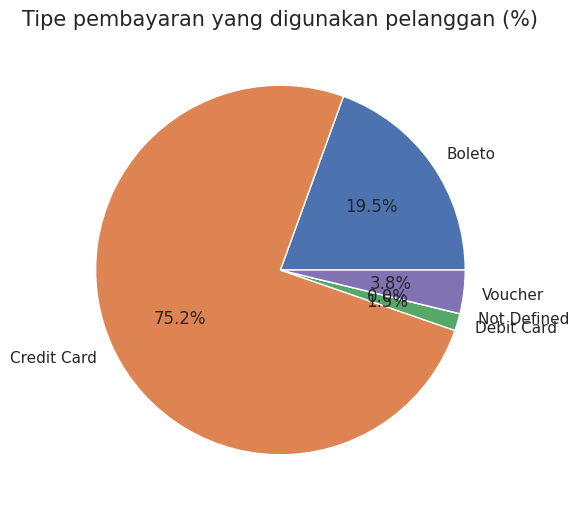

In [158]:
plt.figure(figsize = (14, 6))
plt.pie(group_payment_percentage['order_id'], labels = group_payment_percentage['payment_type'], autopct='%1.1f%%')
plt.title('Tipe pembayaran yang digunakan pelanggan (%)', fontdict = {'fontsize': 15}, pad = 10)

plt.show()

## Conclusion

1. Apa saja 10 kategori produk dengan jumlah produk terjual tertinggi? Apa saja 10 kategori produk dengan jumlah penjualan tertinggi? Apakah keduanya sama?
- Keduanya berbeda. Jumlah produk terjual yang lebih banyak dari kategori lain belum tentu menghasilkan penjualan dalam dolar lebih banyak juga.
- 10 kategori produk dengan jumlah produk terjual tertinggi adalah: Bed Bath Table, Health Beauty, Sport Leisure, Furniture Decor, Computers Accessories, Housewares, Watches Gifts, Telephone, Garden Tools, dan Auto.
- 10 kategori produk dengan jumlah penjualan tertinggi adalah: Bed Bath Table, Health Beauty, Computers Accessories, Furniture Decor, Watches Gifts, Sports Leisure, Housewares, Auto, Garden Tools, dan Cool Stuff.


2. Bagaimana tingkat kepuasan pelanggan terhadap layanan?
- Mayoritas pelanggan memberikan rating sempurna sehingga dapat dikatakan tingkat kepuasan pelanggan terhadap layanan sudah baik.


3. Tipe pembayaran apa yang paling sering digunakan pelanggan?
- Tipe pembayaran yang paling sering digunakan pelanggan dalam bertransaksi adalah kartu kredit sebanyak 75,2%. Kemudian diikuti oleh Boleto sebanyak 19,5%. Sisanya pelanggan menggunakan tipe pembayaran berupa voucher, dan kartu debit.